In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing dataset

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


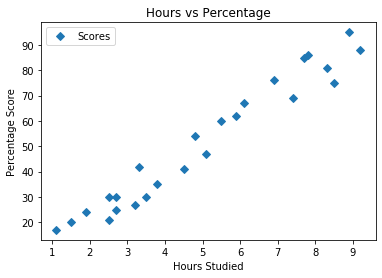

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='D')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing data i.e Training and testing it



In [19]:

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


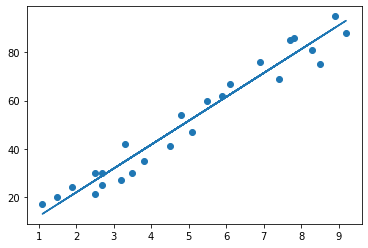

In [22]:

# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [27]:
# Predicting the scores
y_pred = model.predict(X_test)
print(y_pred)
y_pred.reshape(1,-1)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


array([[16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328]])

In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
# Predicting scores when a person studied 9.25 hours a day 
hours = np.array([9.25])
hours = hours.reshape(-1,1)
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  4.183859899002975
Mean Squared  Error      :  21.5987693072174
Root Mean Squared  Error :  4.6474476121003665
R Squared Error          :  0.9454906892105356
